In [1]:
import pprint 
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2023-02-20 15:50:39.954725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data = pd.read_csv('insurance.csv')

In [6]:
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
147,51,female,37.730,1,no,southeast,9877.60770
176,38,male,27.835,2,no,northwest,6455.86265
184,44,male,30.690,2,no,southeast,7731.42710
1299,19,female,25.745,1,no,northwest,2710.82855
41,31,female,36.630,2,no,southeast,4949.75870
1068,63,male,21.660,1,no,northwest,14349.85440
716,49,female,22.610,1,no,northwest,9566.99090
742,53,male,34.105,0,yes,northeast,43254.41795
821,26,male,17.670,0,no,northwest,2680.94930
249,29,male,28.975,1,no,northeast,4040.55825


In [7]:
data.shape

(1338, 7)

In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [10]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
data['smoker'].value_counts() 

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

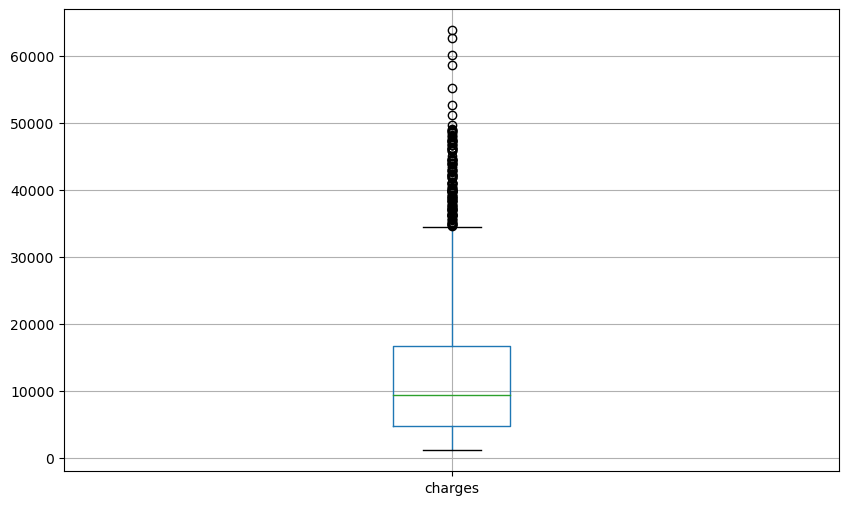

In [14]:
plt.figure(figsize=(10, 6))

data.boxplot('charges')
plt.show()

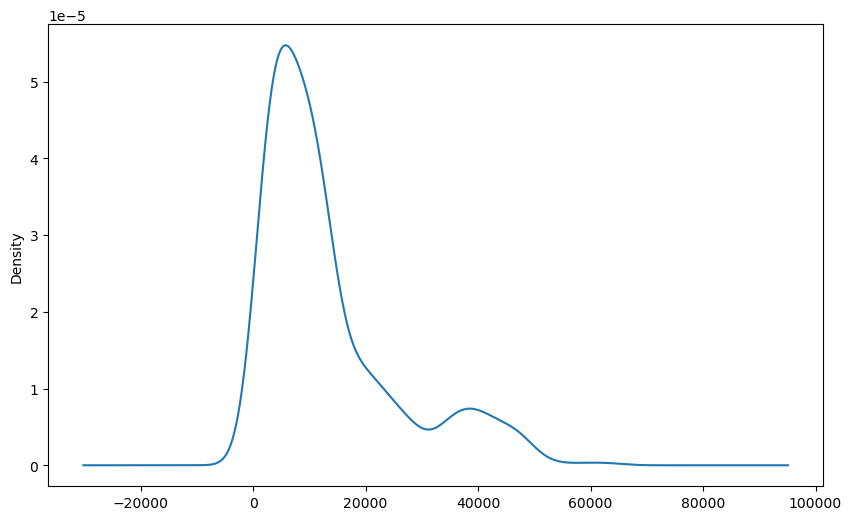

In [15]:
plt.figure(figsize=(10, 6))
data['charges'].plot.kde()
plt.show()

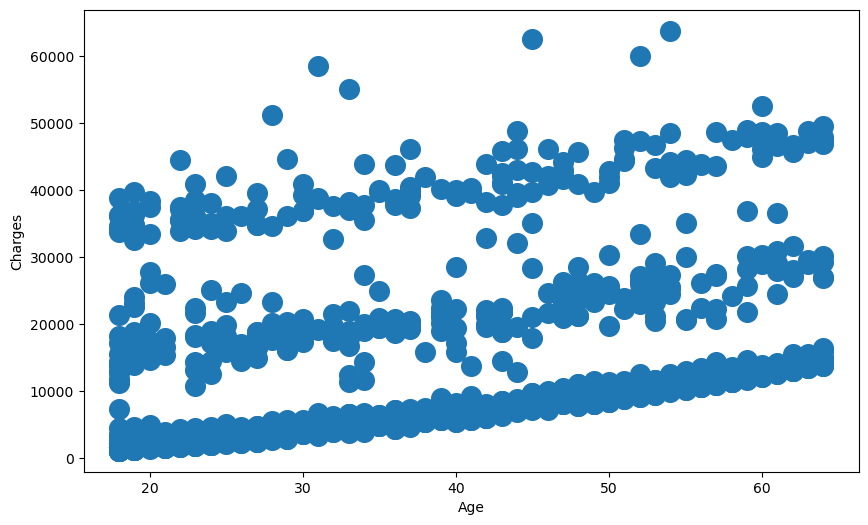

In [16]:
plt.figure(figsize=(10, 6))

plt.scatter(data['age'], data['charges'], s=200)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


In [17]:
features = data.drop('charges', axis=1)
labels = data[['charges']]

In [28]:
categorical_features = features[['sex', 'smoker', 'region']].copy()
categorical_features.head() 

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [29]:
numeric_features = features.drop(['sex', 'smoker', 'region'], axis=1) 
numeric_features.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [30]:
sex_dict = {'male': 0, 'female': 1}
smoker_dict = {'no': 0, 'yes': 1}

categorical_features['sex'].replace(sex_dict, inplace=True)
categorical_features['smoker'].replace(smoker_dict, inplace=True)


In [31]:
# One-hot encode the categorical features
categorical_features = pd.get_dummies(categorical_features, columns=['region'])
categorical_features.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,1,1,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [32]:
standardScaler = StandardScaler()
numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), columns=numeric_features.columns, index=numeric_features.index)
numeric_features.describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.853691e-16,-1.869041e-16,2.721623e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


In [33]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)
processed_features.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,0,0,0,0,1,0
2,-0.797954,0.383307,1.580926,0,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,0,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,0,0,0,1,0,0


In [35]:
processed_data =  pd.concat([processed_features, data['charges']], axis=1, sort=False)
processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,1,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,0,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,0,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,0,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,0,0,0,1,0,0,3866.85520


In [36]:
from sklearn.model_selection import train_test_split


In [37]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, processed_data['charges'], test_size=0.2, random_state=1)

In [38]:
x_train.shape, x_test.shape

((1070, 9), (268, 9))

In [39]:
print(x_train.keys())

Index(['age', 'bmi', 'children', 'sex', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [40]:
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model

In [41]:
model_relu = build_model()
model_relu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


2023-02-20 16:14:15.332340: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


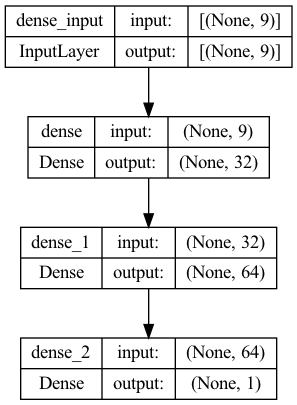

In [42]:
keras.utils.plot_model(model_relu, 'model_relu.png', show_shapes=True)

In [43]:
num_epochs = 1000

history_relu = model_relu.fit(
    x_train, y_train,
    epochs=num_epochs, validation_split = 0.2, verbose=True)

Epoch 1/1000
27/27 [==============================] - 0s 6ms/step - loss: 317052672.0000 - mae: 13317.5117 - mse: 317052672.0000 - val_loss: 336097088.0000 - val_mae: 12876.6729 - val_mse: 336097088.0000
Epoch 2/1000
27/27 [==============================] - 0s 2ms/step - loss: 316998560.0000 - mae: 13315.6113 - mse: 316998560.0000 - val_loss: 336023008.0000 - val_mae: 12874.1182 - val_mse: 336023008.0000
Epoch 3/1000
27/27 [==============================] - 0s 2ms/step - loss: 316886208.0000 - mae: 13311.8271 - mse: 316886208.0000 - val_loss: 335869248.0000 - val_mae: 12868.9072 - val_mse: 335869248.0000
Epoch 4/1000
27/27 [==============================] - 0s 2ms/step - loss: 316661792.0000 - mae: 13304.3037 - mse: 316661792.0000 - val_loss: 335567520.0000 - val_mae: 12858.9131 - val_mse: 335567520.0000
Epoch 5/1000
27/27 [==============================] - 0s 2ms/step - loss: 316249056.0000 - mae: 13290.6201 - mse: 316249056.0000 - val_loss: 335036640.0000 - val_mae: 12841.5273 - val_

In [44]:
training_history_df = pd.DataFrame(history_relu.history)
training_history_df['epoch'] = history_relu.epoch

training_history_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,20302002.0,2639.018311,20302002.0,20532538.0,2586.834229,20532538.0,995
996,20294326.0,2619.788818,20294326.0,20524866.0,2583.046631,20524866.0,996
997,20311100.0,2606.999756,20311100.0,20548604.0,2589.319824,20548604.0,997
998,20322252.0,2671.429443,20322252.0,20533792.0,2584.260498,20533792.0,998
999,20291540.0,2644.283936,20291540.0,20621614.0,2618.993652,20621614.0,999


9/9 [==============================] - 0s 612us/step


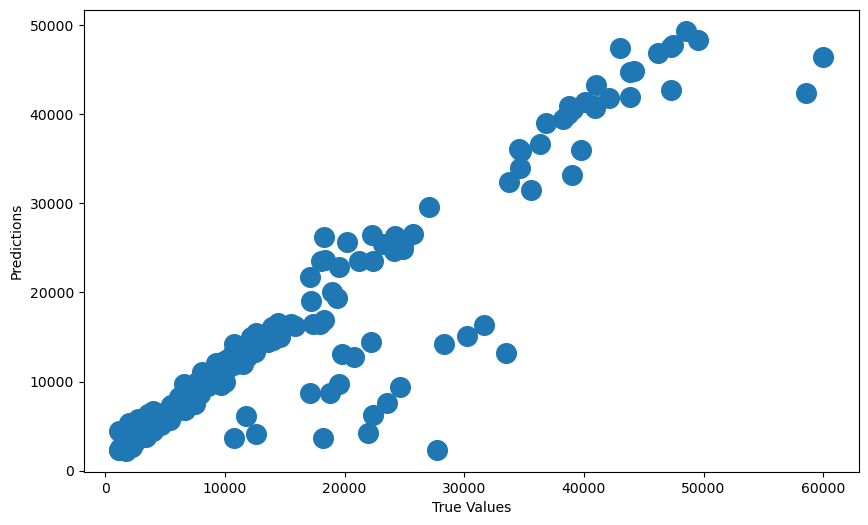

In [45]:
y_pred = model_relu.predict(x_test).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, s=200)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [46]:
r2_score(y_test, y_pred)

0.8746836921449068

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [ ]:
plt.figure(figsize=(10, 6))

plotter.plot({'Basic': history_relu}, metric = "mae")

plt.ylabel('MAE [charges]')
plt.show()
